<a href="https://colab.research.google.com/github/GKD-stack/DSC180A-Methodology-1/blob/main/Lihao_Liu_DSC180A_1000_Genomes.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas_plink as pp
import statsmodels.api as sm
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

## Gene Expression Data

In [ ]:
gene_expression_data = pd.read_csv('GD462.GeneQuantRPKM.50FN.samplename.resk10.txt', delimiter='\t')

In [ ]:
gene_expression_data

,TargetID,Gene_Symbol,Chr,Coord,HG00096,HG00097,HG00099,HG00100,HG00101,HG00102,...,NA20810,NA20811,NA20812,NA20813,NA20814,NA20815,NA20816,NA20819,NA20826,NA20828
0,ENSG00000152931.6,ENSG00000152931.6,5,59783540,0.101858,0.078110,0.048981,0.118597,0.004035,0.010925,...,0.088601,0.240010,0.137175,0.148494,0.038643,0.088509,0.029204,0.024423,0.044816,0.139186
1,ENSG00000183696.9,ENSG00000183696.9,7,48128225,8.183805,5.686911,2.434653,3.830894,6.612288,4.709646,...,13.428205,6.094500,12.536000,2.217262,3.573394,7.583364,4.052882,1.570378,4.900372,6.737308
2,ENSG00000139269.2,ENSG00000139269.2,12,57846106,1.199910,1.573572,0.521616,1.447225,3.565791,1.982681,...,3.225880,1.996067,2.854923,2.267343,1.331201,2.187895,1.004250,3.003316,1.984362,1.684954
3,ENSG00000169129.8,ENSG00000169129.8,10,116164515,0.831940,0.069778,0.931086,0.620941,1.660668,0.570481,...,1.023381,1.127852,0.774409,1.495854,0.895342,1.513521,0.826377,1.021201,0.952502,0.740565
4,ENSG00000134602.11,ENSG00000134602.11,X,131157293,27.646422,24.395572,16.445374,24.806650,25.113349,19.233988,...,25.079490,28.725528,24.450520,27.264069,26.912814,29.509210,26.462331,25.624009,25.707741,22.824957
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
23717,ENSG00000235472.1,ENSG00000235472.1,13,29172970,31.582832,34.071123,19.394365,37.523721,33.430473,37.844966,...,47.905182,33.224977,39.827675,27.096811,34.686342,37.386766,30.598840,33.516674,32.017940,38.341888
23718,ENSG00000114423.14,ENSG00000114423.14,3,105588396,14.054749,14.477899,11.584425,12.637956,12.015089,13.750655,...,11.723462,9.900372,10.473115,13.433413,15.832594,19.216176,10.213739,14.563192,15.637732,8.357117
23719,ENSG00000243312.2,ENSG00000243312.2,4,87791344,1.112114,0.831797,0.253228,0.271568,0.486086,1.362640,...,1.168991,0.645389,0.819469,0.515448,0.463054,1.580658,0.701396,0.771233,0.857330,0.703369
23720,ENSG00000257337.1,ENSG00000257337.1,12,53448222,3.826396,6.045798,2.593872,4.447169,5.294657,4.106823,...,6.524398,6.017795,3.460273,3.905032,5.023161,5.333027,5.694370,8.142939,5.622043,6.026476


In [ ]:
gene_expression_data.shape

(23722, 466)

### Filter the single gene ADSL out

In [ ]:
gene_expression_data['TargetID'] = gene_expression_data['TargetID'].str.split('.').str[0]
adsl_expression = gene_expression_data[gene_expression_data["TargetID"] == "ENSG00000239900"]
adsl_expression = adsl_expression.drop(columns=['TargetID','Gene_Symbol', 'Chr', 'Coord'])
adsl_expression

,HG00096,HG00097,HG00099,HG00100,HG00101,HG00102,HG00103,HG00104,HG00105,HG00106,...,NA20810,NA20811,NA20812,NA20813,NA20814,NA20815,NA20816,NA20819,NA20826,NA20828
1401,42.939836,35.55633,22.413175,37.492781,39.166312,42.582215,42.343922,40.892716,44.92109,27.301186,...,44.741546,37.308203,42.375943,40.247514,34.591029,51.191426,41.101018,44.559222,28.328619,49.705869


### Read the fam, bim,bed files in

In [ ]:
bfile = "1000G.EUR.22.ADSL" # specify the path to your bed file without the extension
(bim, fam, bed) = pp.read_plink(bfile)
bed = bed.compute()


Mapping files: 100%|██████████| 3/3 [00:00<00:00, 52.75it/s]


In [ ]:
bim.head()

,chrom,snp,cm,pos,a0,a1,i
0,22,rs5757682,49.073025,39848259,T,G,0
1,22,rs5757683,49.073334,39850174,G,A,1
2,22,rs1557541,49.078505,39851970,C,A,2
3,22,rs738289,49.083646,39855883,C,T,3
4,22,rs909674,49.088870,39859169,C,A,4


In [ ]:
fam.head()

,fid,iid,father,mother,gender,trait,i
0,HG00096,HG00096,0,0,0,-9,0
1,HG00097,HG00097,0,0,0,-9,1
2,HG00099,HG00099,0,0,0,-9,2
3,HG00101,HG00101,0,0,0,-9,3
4,HG00102,HG00102,0,0,0,-9,4


In [ ]:
bed

array([[1., 2., 2., ..., 0., 2., 0.],
       [1., 2., 2., ..., 0., 2., 0.],
       [1., 2., 2., ..., 0., 2., 0.],
       ...,
       [0., 1., 0., ..., 1., 2., 1.],
       [2., 1., 2., ..., 2., 2., 2.],
       [2., 2., 2., ..., 2., 2., 2.]], dtype=float32)

### Filter the number of people first

In [ ]:
fam_ids = fam['fid'].tolist()
expression_ids = adsl_expression.columns.tolist()


In [ ]:
intersection_ids = set(fam_ids).intersection(set(expression_ids))
len(intersection_ids)

344

In [ ]:
intersection_ids

{'HG00096',
 'HG00097',
 'HG00099',
 'HG00101',
 'HG00102',
 'HG00103',
 'HG00105',
 'HG00108',
 'HG00109',
 'HG00110',
 'HG00111',
 'HG00112',
 'HG00114',
 'HG00115',
 'HG00118',
 'HG00119',
 'HG00120',
 'HG00121',
 'HG00122',
 'HG00125',
 'HG00126',
 'HG00127',
 'HG00128',
 'HG00129',
 'HG00130',
 'HG00131',
 'HG00132',
 'HG00133',
 'HG00136',
 'HG00137',
 'HG00138',
 'HG00139',
 'HG00141',
 'HG00142',
 'HG00143',
 'HG00145',
 'HG00146',
 'HG00148',
 'HG00149',
 'HG00150',
 'HG00151',
 'HG00154',
 'HG00155',
 'HG00157',
 'HG00158',
 'HG00159',
 'HG00160',
 'HG00171',
 'HG00173',
 'HG00174',
 'HG00176',
 'HG00177',
 'HG00178',
 'HG00179',
 'HG00180',
 'HG00181',
 'HG00182',
 'HG00183',
 'HG00185',
 'HG00186',
 'HG00187',
 'HG00188',
 'HG00189',
 'HG00231',
 'HG00232',
 'HG00233',
 'HG00234',
 'HG00235',
 'HG00236',
 'HG00238',
 'HG00239',
 'HG00242',
 'HG00243',
 'HG00244',
 'HG00245',
 'HG00246',
 'HG00250',
 'HG00251',
 'HG00252',
 'HG00253',
 'HG00255',
 'HG00256',
 'HG00257',
 'HG

#### Filter Expression data

In [ ]:
adsl_expression_filtered = adsl_expression[intersection_ids]
adsl_expression_filtered

C:\Users\13269\AppData\Local\Temp\ipykernel_46384\512107377.py:1: FutureWarning: Passing a set as an indexer is deprecated and will raise in a future version. Use a list instead.
  adsl_expression_filtered = adsl_expression[intersection_ids]


,HG00311,HG00276,NA20799,HG00181,NA12340,HG00265,HG00258,HG00159,HG00332,NA12413,...,NA12287,HG00118,HG00315,HG00337,NA06984,NA20517,HG00179,NA20535,HG00246,NA07037
1401,48.556388,37.840318,30.587724,42.640262,32.431282,41.84944,39.094734,32.823052,50.124007,42.119722,...,41.350467,42.242544,45.707899,50.008015,31.464336,50.312843,42.95383,40.509749,39.348524,31.289615


#### Filter .bed

In [ ]:
bed_df = pd.DataFrame(bed, columns=list(fam_ids))

# Filter the columns of genotypes DataFrame based on the intersection IDs
bed_filtered = bed_df[intersection_ids]
bed_filtered_array = bed_filtered.to_numpy()
bed_filtered

C:\Users\13269\AppData\Local\Temp\ipykernel_46384\3016474223.py:4: FutureWarning: Passing a set as an indexer is deprecated and will raise in a future version. Use a list instead.
  bed_filtered = bed_df[intersection_ids]


,HG00311,HG00276,NA20799,HG00181,NA12340,HG00265,HG00258,HG00159,HG00332,NA12413,...,NA12287,HG00118,HG00315,HG00337,NA06984,NA20517,HG00179,NA20535,HG00246,NA07037
0,1.0,2.0,2.0,0.0,2.0,1.0,2.0,1.0,1.0,2.0,...,2.0,1.0,2.0,2.0,2.0,2.0,2.0,2.0,2.0,2.0
1,1.0,2.0,2.0,0.0,2.0,1.0,2.0,1.0,1.0,2.0,...,2.0,1.0,2.0,2.0,2.0,2.0,2.0,2.0,2.0,2.0
2,1.0,2.0,2.0,0.0,2.0,1.0,2.0,1.0,1.0,2.0,...,2.0,1.0,2.0,2.0,2.0,2.0,2.0,2.0,2.0,2.0
3,1.0,2.0,2.0,0.0,2.0,1.0,2.0,1.0,1.0,2.0,...,2.0,1.0,2.0,2.0,2.0,2.0,2.0,2.0,2.0,2.0
4,1.0,2.0,2.0,0.0,2.0,1.0,2.0,1.0,1.0,2.0,...,2.0,1.0,2.0,2.0,2.0,2.0,2.0,2.0,2.0,2.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
325,2.0,2.0,2.0,2.0,2.0,2.0,2.0,2.0,2.0,2.0,...,2.0,2.0,2.0,2.0,2.0,2.0,2.0,2.0,2.0,2.0
326,1.0,2.0,1.0,2.0,2.0,2.0,2.0,2.0,2.0,1.0,...,2.0,2.0,2.0,2.0,1.0,2.0,2.0,1.0,2.0,2.0
327,1.0,1.0,1.0,1.0,1.0,1.0,1.0,2.0,2.0,1.0,...,2.0,2.0,0.0,1.0,1.0,1.0,1.0,1.0,1.0,2.0
328,1.0,1.0,2.0,1.0,2.0,2.0,2.0,2.0,2.0,2.0,...,2.0,2.0,2.0,2.0,2.0,2.0,1.0,2.0,2.0,2.0


In [ ]:
bed_filtered_array,bed_filtered_array.shape

(array([[1., 2., 2., ..., 2., 2., 2.],
        [1., 2., 2., ..., 2., 2., 2.],
        [1., 2., 2., ..., 2., 2., 2.],
        ...,
        [1., 1., 1., ..., 1., 1., 2.],
        [1., 1., 2., ..., 2., 2., 2.],
        [1., 2., 1., ..., 1., 2., 2.]], dtype=float32),
 (330, 344))

### Linear Rgression

In [ ]:
results = []
num_snps = bed_filtered_array.shape[0]

for snp_index in range(num_snps):
    snp = bed_filtered_array[snp_index, :]
    gene_expression = adsl_expression_filtered.iloc[0]

    snp_with_intercept = sm.add_constant(snp)

    model = sm.OLS(gene_expression, snp_with_intercept)
    result = model.fit()
    results.append(result.pvalues[1]) #using [1] since we are interested in the SNP p-value


### Visualization locusZoom plot

In [ ]:
genomic_coordinates = bim["pos"]
log10_p_values = -np.log10(results)

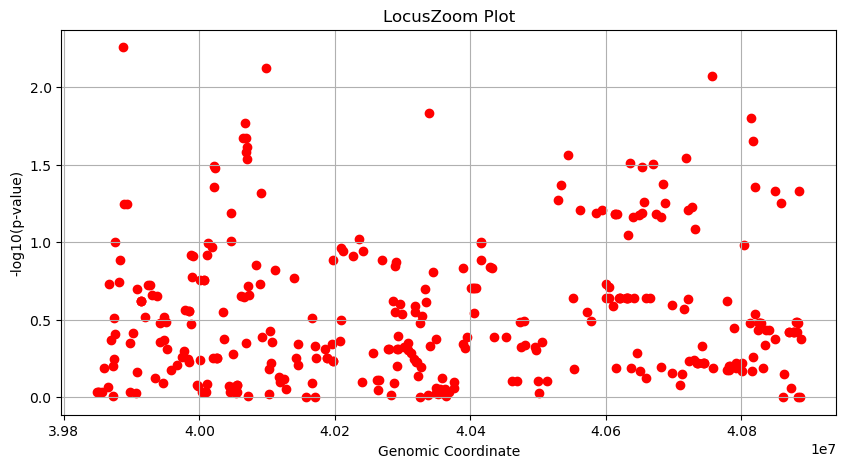

In [ ]:
plt.figure(figsize=(10, 5))
plt.scatter(genomic_coordinates, log10_p_values, color='red')
plt.xlabel('Genomic Coordinate')
plt.ylabel('-log10(p-value)')
plt.title('LocusZoom Plot')
plt.grid(True)
plt.show()

#### The following cell is the entire procedure from the above

In [ ]:
gene_expression_data = pd.read_csv('GD462.GeneQuantRPKM.50FN.samplename.resk10.txt', delimiter='\t')
gene_expression_data['TargetID'] = gene_expression_data['TargetID'].str.split('.').str[0]
adsl_expression = gene_expression_data[gene_expression_data["TargetID"] == "ENSG00000239900"]
adsl_expression = adsl_expression.drop(columns=['TargetID','Gene_Symbol', 'Chr', 'Coord'])
bfile = "1000G.EUR.22.ADSL" # specify the path to your bed file without the extension
(bim, fam, bed) = pp.read_plink(bfile)
bed = bed.compute()
fam_ids = fam['fid'].tolist()
expression_ids = adsl_expression.columns.tolist()
intersection_ids = set(fam_ids).intersection(set(expression_ids))
adsl_expression_filtered = adsl_expression[intersection_ids]
bed_df = pd.DataFrame(bed, columns=list(fam_ids))

# Filter the columns of genotypes DataFrame based on the intersection IDs
bed_filtered = bed_df[intersection_ids]
bed_filtered_array = bed_filtered.to_numpy()
results = []
num_snps = bed_filtered_array.shape[0]

for snp_index in range(num_snps):
    snp = bed_filtered_array[snp_index, :]
    gene_expression2 = adsl_expression_filtered.iloc[0]

    snp_with_intercept = sm.add_constant(snp)

    model = sm.OLS(gene_expression2, snp_with_intercept)
    result = model.fit()
    results.append(result.pvalues[1]) #using [1] since we are interested in the SNP p-value


Mapping files: 100%|██████████| 3/3 [00:00<00:00, 230.74it/s]
C:\Users\13269\AppData\Local\Temp\ipykernel_46384\3557448216.py:11: FutureWarning: Passing a set as an indexer is deprecated and will raise in a future version. Use a list instead.
  adsl_expression_filtered = adsl_expression[intersection_ids]
C:\Users\13269\AppData\Local\Temp\ipykernel_46384\3557448216.py:15: FutureWarning: Passing a set as an indexer is deprecated and will raise in a future version. Use a list instead.
  bed_filtered = bed_df[intersection_ids]


# eQTL analysis of all genes on chromosome 22

In [ ]:
# 1. Load Data
expression_data = pd.read_csv('GD462.GeneQuantRPKM.50FN.samplename.resk10.txt', delimiter='\t')
gene_annot = pd.read_csv('gene_annot.txt', delimiter='\t')  # assuming you have a file with gene annotations
(bim, fam, bed) = pp.read_plink('1000G.EUR.22')  # read the whole chromosome 22 genotype data

# 2. Filter for Chromosome 22
expression_data['TargetID'] = expression_data['TargetID'].str.split('.').str[0]
expression_data = expression_data[expression_data['Chr'] == '22']
gene_annot = gene_annot[gene_annot['CHR'] == 22]


Mapping files: 100%|██████████| 3/3 [00:00<00:00, 21.19it/s]


In [ ]:
bim

,chrom,snp,cm,pos,a0,a1,i
0,22,rs9617528,0.059576,16061016,C,T,0
1,22,rs4911642,2.127458,16504399,C,T,1
2,22,rs7287144,2.252105,16886873,G,A,2
3,22,rs5748662,2.255191,16892858,A,G,3
4,22,rs5994034,2.255836,16894090,T,C,4
...,...,...,...,...,...,...,...
17484,22,rs13056621,75.088001,51181759,A,G,17484
17485,22,rs3865766,75.091403,51186228,T,C,17485
17486,22,rs3888396,75.110507,51211392,C,T,17486
17487,22,rs2238837,75.111632,51212875,C,A,17487


In [ ]:
fam

,fid,iid,father,mother,gender,trait,i
0,HG00096,HG00096,0,0,0,-9,0
1,HG00097,HG00097,0,0,0,-9,1
2,HG00099,HG00099,0,0,0,-9,2
3,HG00101,HG00101,0,0,0,-9,3
4,HG00102,HG00102,0,0,0,-9,4
...,...,...,...,...,...,...,...
484,NA20822,NA20822,0,0,0,-9,484
485,NA20826,NA20826,0,0,0,-9,485
486,NA20827,NA20827,0,0,0,-9,486
487,NA20828,NA20828,0,0,0,-9,487


In [ ]:
gene_annot

,ID,CHR,START,STOP,SYM,TYPE
20010,OR11H1,22,15528157,15529139,ENSG00000130538,protein_coding
20011,POTEH,22,15690025,15721522,ENSG00000198062,protein_coding
20012,CCT8L2,22,16590776,16592810,ENSG00000198445,protein_coding
20013,TPTEP1,22,16601886,16698742,ENSG00000100181,lincRNA
20014,ANKRD62P1-PARP4P3,22,16659857,16673825,ENSG00000189295,processed_transcript
...,...,...,...,...,...,...
20495,ARSA,22,50622753,50628179,ENSG00000100299,protein_coding
20496,SHANK3,22,50674414,50733298,ENSG00000251322,protein_coding
20497,ACR,22,50738195,50745334,ENSG00000100312,protein_coding
20498,RPL23AP82,22,50756947,50801309,ENSG00000184319,transcribed_unprocessed_pseudogene


In [ ]:
expression_data

,TargetID,Gene_Symbol,Chr,Coord,HG00096,HG00097,HG00099,HG00100,HG00101,HG00102,...,NA20810,NA20811,NA20812,NA20813,NA20814,NA20815,NA20816,NA20819,NA20826,NA20828
22,ENSG00000249263,ENSG00000249263.2,22,17140518,0.340656,0.318942,-0.009145,0.231503,0.089713,0.482984,...,0.032117,0.213629,0.225474,0.134216,0.128749,0.060841,0.298061,-0.011292,0.058276,-0.013384
29,ENSG00000224688,ENSG00000224688.1,22,21496660,4.194827,3.369440,2.335470,4.477910,3.641758,3.296741,...,4.669164,3.918440,4.977372,3.253683,3.322997,6.613617,3.438039,3.768840,3.248447,4.300825
45,ENSG00000075240,ENSG00000075240.12,22,46971909,3.531803,3.635541,1.251434,3.007745,3.574070,4.569758,...,4.057426,3.736969,3.156168,6.785470,5.646243,2.418243,4.678466,4.626435,5.101994,4.100622
81,ENSG00000099937,ENSG00000099937.6,22,21128167,0.519054,0.399216,0.078965,0.145628,0.446993,0.217271,...,0.621082,0.414906,1.047612,0.353794,0.253339,0.492650,0.449070,0.081118,0.164197,0.287428
85,ENSG00000099998,ENSG00000099998.12,22,24641110,0.073630,0.041109,0.017493,-0.020552,0.000059,-0.007782,...,0.045730,0.003584,0.027056,0.007583,0.063843,0.059052,-0.008820,0.017421,0.010471,0.105646
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
23631,ENSG00000100121,ENSG00000100121.8,22,22988780,2.198850,2.083065,1.996587,2.239116,3.570457,4.731377,...,4.254171,3.959983,6.706213,4.905286,4.190235,2.707226,4.337316,3.922871,4.006087,1.814178
23656,ENSG00000099958,ENSG00000099958.10,22,24181315,7.977406,9.358290,4.416089,7.388032,9.040660,3.006184,...,5.593587,9.125373,8.040828,23.925241,4.978087,10.765797,8.942371,11.637476,5.709065,5.991736
23664,ENSG00000233360,ENSG00000233360.2,22,38054384,0.331823,0.596443,0.249310,0.555526,0.512440,0.406920,...,0.698186,0.480949,0.618142,0.685900,0.562676,0.720030,0.509328,0.625647,0.350221,0.690760
23690,ENSG00000100335,ENSG00000100335.8,22,39895437,32.780167,19.257997,10.134445,19.492117,23.514977,18.573965,...,15.526094,19.575823,19.762865,27.183728,19.115340,19.839556,17.402229,15.723492,18.447801,22.720913


In [ ]:
# 490 genes on chromosome 22
len(set(gene_annot["ID"]))

490

In [ ]:
# 3. Find common individuals
fam_ids = fam['fid'].tolist()
expression_ids = expression_data.columns.tolist()
intersection_ids = set(fam_ids).intersection(set(expression_ids))

# Filter the expression data and genotype data to include only common individuals
expression_data_filtered = expression_data[intersection_ids]
bed_filtered = bed[:, fam[fam['fid'].isin(intersection_ids)].index].compute()

# 4. Cis-eQTL Analysis
results = []
window_size = 500000  # 500 Kb window size
for gene_row in gene_annot.itertuples():
    gene_id = gene_row.ID
    gene_sym = gene_annot[gene_annot["ID"] == gene_id]["SYM"].iloc[0]
    gene_start = gene_row.START
    gene_end = gene_row.STOP

    # Filter SNPs within the window of the gene
    cis_snps = bim[(bim['pos'] > gene_start - window_size) & (bim['pos'] < gene_end + window_size)]

    if cis_snps.empty:
        continue
    gene_expression_df = expression_data_filtered[expression_data["TargetID"] == gene_sym]

    if gene_expression_df.empty:
        continue

    gene_expression = gene_expression_df.iloc[0]

    for snp_row in cis_snps.itertuples():
        snp_id = snp_row.snp
        snp = bed_filtered[snp_row.Index, :]

        if len(gene_expression) != len(snp):
            # Handle mismatch in length between gene expression and SNP data
            continue

        # Add a constant term to the independent variables to represent the intercept
        snp_with_intercept = sm.add_constant(snp)

        # Perform linear regression
        model = sm.OLS(gene_expression, snp_with_intercept)
        result = model.fit()

        # Check if there are enough parameters in the results
        if len(result.params) < 2:
            continue

        pvalue = result.pvalues[1]
        beta = result.params[1]
        std_err = result.bse[1]

        results.append({
            'gene_id': gene_id,
            'gene_symbol': gene_sym,
            'snp_id': snp_id,
            'pvalue': pvalue,
            'OR': beta,
            'SE': std_err,
            'snp_position': snp_row.pos
        })

# 5. Store Results
results_df = pd.DataFrame(results)

# 6. Visualization
# You can now create plots based on the results_df DataFrame


C:\Users\13269\AppData\Local\Temp\ipykernel_33364\157391464.py:7: FutureWarning: Passing a set as an indexer is deprecated and will raise in a future version. Use a list instead.
  expression_data_filtered = expression_data[intersection_ids]


In [ ]:
results_df

,gene_id,gene_symbol,snp_id,pvalue,OR,SE,snp_position
0,TPTEP1,ENSG00000100181,rs4911642,0.198965,-0.008432,0.006552,16504399
1,TPTEP1,ENSG00000100181,rs7287144,0.021243,0.012606,0.005447,16886873
2,TPTEP1,ENSG00000100181,rs5748662,0.024217,0.011912,0.005262,16892858
3,TPTEP1,ENSG00000100181,rs5994034,0.788915,0.002078,0.007756,16894090
4,TPTEP1,ENSG00000100181,rs4010554,0.035613,0.011247,0.005331,16894264
...,...,...,...,...,...,...,...
177548,RABL2B,ENSG00000079974,rs13056621,0.865247,0.046047,0.271144,51181759
177549,RABL2B,ENSG00000079974,rs3865766,0.996830,0.000715,0.179930,51186228
177550,RABL2B,ENSG00000079974,rs3888396,0.340312,-0.239521,0.250838,51211392
177551,RABL2B,ENSG00000079974,rs2238837,0.981802,-0.004404,0.192948,51212875


### Create the data for generating Polygenic Risk Score

In [ ]:
dd = bim[["chrom","snp","a0","a1"]]
dd

,chrom,snp,a0,a1
0,22,rs9617528,C,T
1,22,rs4911642,C,T
2,22,rs7287144,G,A
3,22,rs5748662,A,G
4,22,rs5994034,T,C
...,...,...,...,...
17484,22,rs13056621,A,G
17485,22,rs3865766,T,C
17486,22,rs3888396,C,T
17487,22,rs2238837,C,A


In [ ]:
results_df = results_df.merge(dd,left_on = "snp_id",right_on = "snp")

In [ ]:
results_df2 = results_df.rename(columns={'snp_id': 'SNP', 'chrom': 'CHR', 'a0':'A1', 'a1':'A2', 'snp_position':'BP'})
results_df2 = results_df2.drop(columns = ["snp"])
results_df2

,gene_id,gene_symbol,SNP,pvalue,OR,SE,BP,CHR,A1,A2
0,TPTEP1,ENSG00000100181,rs4911642,0.198965,-0.008432,0.006552,16504399,22,C,T
1,TPTEP1,ENSG00000100181,rs7287144,0.021243,0.012606,0.005447,16886873,22,G,A
2,CECR7,ENSG00000237438,rs7287144,0.777675,-0.019559,0.069217,16886873,22,G,A
3,IL17RA,ENSG00000177663,rs7287144,0.187850,-0.155152,0.117575,16886873,22,G,A
4,CECR6,ENSG00000183307,rs7287144,0.993562,0.000013,0.001571,16886873,22,G,A
...,...,...,...,...,...,...,...,...,...,...
177548,RPL23AP82,ENSG00000184319,rs2238837,0.390999,-0.226775,0.264030,51212875,22,C,A
177549,RABL2B,ENSG00000079974,rs2238837,0.981802,-0.004404,0.192948,51212875,22,C,A
177550,SHANK3,ENSG00000251322,rs28729663,0.663943,0.000902,0.002073,51219006,22,A,G
177551,RPL23AP82,ENSG00000184319,rs28729663,0.937587,-0.027442,0.350196,51219006,22,A,G


### Choose one gene to perform PRS - ADSL

In [ ]:
results_df2 = results_df2[results_df2["gene_id"] == "ADSL"]
results_df2

,gene_id,gene_symbol,SNP,pvalue,OR,SE,BP,CHR,A1,A2
123276,ADSL,ENSG00000239900,rs5757682,0.490725,-0.400180,0.580056,39848259,22,T,G
123286,ADSL,ENSG00000239900,rs5757683,0.490725,-0.400180,0.580056,39850174,22,G,A
123296,ADSL,ENSG00000239900,rs1557541,0.490725,-0.400180,0.580056,39851970,22,C,A
123306,ADSL,ENSG00000239900,rs738289,0.490725,-0.400180,0.580056,39855883,22,C,T
123316,ADSL,ENSG00000239900,rs909674,0.762054,-0.171329,0.565393,39859169,22,C,A
...,...,...,...,...,...,...,...,...,...,...
126391,ADSL,ENSG00000239900,rs6001933,0.694621,1.326360,3.375624,40883169,22,A,C
126406,ADSL,ENSG00000239900,rs10483205,0.204232,-1.113310,0.875233,40883599,22,T,C
126421,ADSL,ENSG00000239900,rs139063,0.538063,0.326866,0.530311,40885186,22,A,G
126436,ADSL,ENSG00000239900,rs5750948,0.803220,-0.270239,1.083665,40886744,22,C,A


#### Write to local file for later uses

In [ ]:
df_string = results_df2.to_string(index=False)
with open('Scale-up-results.txt', 'w') as f:
    f.write(df_string)

In [ ]:
Tiffany = pd.read_csv('genome_Tiffany_AmariutaBartell_v5_Full_20230928160859.txt', delimiter='\t')
Tiffany

C:\Users\13269\AppData\Local\Temp\ipykernel_50656\4223650409.py:1: DtypeWarning: Columns (1) have mixed types. Specify dtype option on import or set low_memory=False.
  Tiffany = pd.read_csv('genome_Tiffany_AmariutaBartell_v5_Full_20230928160859.txt', delimiter='\t')


,rsid,chromosome,position,genotype
0,rs548049170,1,69869,TT
1,rs9326622,1,567092,CC
2,rs116587930,1,727841,GG
3,rs3131972,1,752721,GG
4,rs12184325,1,754105,CC
...,...,...,...,...
643530,i704756,MT,16524,A
643531,i705255,MT,16525,A
643532,i4000757,MT,16526,G
643533,i701671,MT,16526,G


In [ ]:
Tiffany

,rsid,chromosome,position,genotype
0,rs548049170,1,69869,TT
1,rs9326622,1,567092,CC
2,rs116587930,1,727841,GG
3,rs3131972,1,752721,GG
4,rs12184325,1,754105,CC
...,...,...,...,...
643530,i704756,MT,16524,A
643531,i705255,MT,16525,A
643532,i4000757,MT,16526,G
643533,i701671,MT,16526,G
